In [1]:
import os
import re
import glob
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [2]:
target_mCG_df = pd.read_csv("final_filtered.DMRs.tsv", sep="\t")

In [3]:
target_mCG_df.shape

(203809, 69)

In [4]:
target_mCG_df.columns = [re.sub("methylation_level_", "", x) for x in target_mCG_df.columns]

In [5]:
target_mCG_df = target_mCG_df.iloc[:, list(range(6))+[66]+list(range(6,66))+[67,68]]

In [6]:
target_mCG_df

,#chr,start,end,number_of_dms,hypermethylated_samples,hypomethylated_samples,celltype,C,Ctrl,W,...,Ctrl_HIV_10,Ctrl_HIV_13,Ctrl_HIV_16,Ctrl_HIV_19,Ctrl_HIV_22,Ctrl_HIV_25,Ctrl_HIV_4,Ctrl_HIV_7,C_Cov2_6,W_Cov2_26
0,chr1,775204,775204,1,Ctrl,NaN,B-Mem,0.125000,0.800000,0.100000,...,NaN,NaN,1.0,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN
1,chr1,939607,939607,1,Ctrl,C,B-Mem,0.000000,0.754098,0.625000,...,1.00,0.75,1.0,0.000000,0.500000,1.0,0.000000,NaN,NaN,NaN
2,chr1,943937,943937,1,Ctrl,W,B-Mem,1.000000,0.880952,0.526316,...,1.00,1.00,1.0,1.000000,1.000000,1.0,0.500000,1.00,NaN,NaN
3,chr1,1054900,1054901,2,W,Ctrl,B-Mem,0.478261,0.219858,0.808511,...,0.50,0.00,0.0,0.000000,0.250000,0.5,0.000000,0.75,NaN,NaN
4,chr1,1060771,1060771,1,Ctrl,W,B-Mem,0.928571,0.928571,0.576923,...,1.00,1.00,1.0,1.000000,0.666667,NaN,0.800000,1.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203804,chrY,21248929,21248929,1,Ctrl,NaN,Th-Naive,0.285714,0.763636,0.333333,...,1.00,NaN,0.5,0.500000,1.000000,1.0,1.000000,1.00,0.0,NaN
203805,chrY,21713694,21713694,1,Ctrl,W,Th-Naive,0.750000,0.875000,0.384615,...,NaN,0.00,1.0,1.000000,1.000000,1.0,0.714286,1.00,0.0,NaN
203806,chrY,26658009,26658009,1,Ctrl,C,Th-Naive,0.300000,0.857143,0.400000,...,1.00,1.00,0.6,0.857143,NaN,1.0,0.500000,1.00,0.0,NaN
203807,chrY,56825723,56825723,1,Ctrl,W,Th-Naive,0.761905,0.905405,0.594595,...,0.75,NaN,1.0,1.000000,1.000000,NaN,1.000000,NaN,0.5,0.0


In [7]:
target_mCG_df = target_mCG_df.sample(n=100000).reset_index(drop=True)

In [8]:
target_mCG_df.columns

Index(['#chr', 'start', 'end', 'number_of_dms', 'hypermethylated_samples',
       'hypomethylated_samples', 'celltype', 'C', 'Ctrl', 'W', 'C_Cov2_1',
       'C_Cov2_12', 'C_Cov2_13', 'C_Cov2_17', 'C_Cov2_18', 'C_Cov2_19',
       'C_Cov2_2', 'C_Cov2_21', 'C_Cov2_23', 'C_Cov2_5', 'C_Cov2_8',
       'W_Cov2_10', 'W_Cov2_11', 'W_Cov2_14', 'W_Cov2_15', 'W_Cov2_20',
       'W_Cov2_22', 'W_Cov2_24', 'W_Cov2_25', 'W_Cov2_27', 'W_Cov2_3',
       'W_Cov2_7', 'W_Cov2_9', 'Ctrl_Ctrl_1', 'Ctrl_Ctrl_10', 'Ctrl_Ctrl_11',
       'Ctrl_Ctrl_12', 'Ctrl_Ctrl_13', 'Ctrl_Ctrl_14', 'Ctrl_Ctrl_15',
       'Ctrl_Ctrl_2', 'Ctrl_Ctrl_3', 'Ctrl_Ctrl_4', 'Ctrl_Ctrl_5',
       'Ctrl_Ctrl_9', 'Ctrl_Flu_1', 'Ctrl_Flu_11', 'Ctrl_Flu_13',
       'Ctrl_Flu_15', 'Ctrl_Flu_17', 'Ctrl_Flu_19', 'Ctrl_Flu_21',
       'Ctrl_Flu_23', 'Ctrl_Flu_25', 'Ctrl_Flu_3', 'Ctrl_Flu_5', 'Ctrl_Flu_7',
       'Ctrl_Flu_9', 'Ctrl_HIV_1', 'Ctrl_HIV_10', 'Ctrl_HIV_13', 'Ctrl_HIV_16',
       'Ctrl_HIV_19', 'Ctrl_HIV_22', 'Ctrl_HIV_25', 'Ctrl_

In [9]:
sample_data = target_mCG_df

/gale/netapp/DoD/wenliang/bin/miniconda3_4.9.2/envs/echo/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


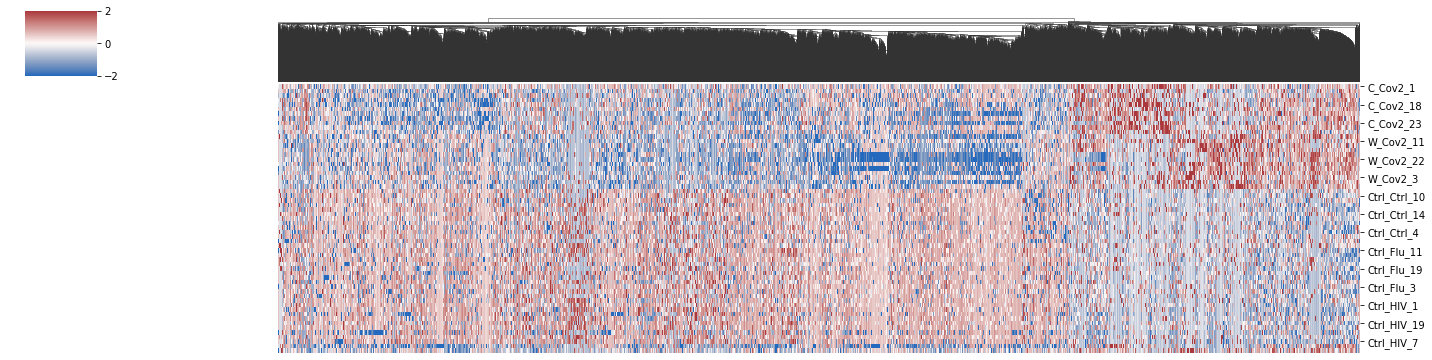

In [10]:
cluster_grid = sns.clustermap(data=sample_data.iloc[:, 10:].astype(float).fillna(0).T, figsize=(20, 5), xticklabels=False, \
                              row_cluster=False, col_cluster=True, z_score=1, cmap='vlag', vmin=-2, vmax=2)

In [11]:
zscore_order = cluster_grid.dendrogram_col.reordered_ind

In [12]:
plot_merge_df = sample_data.iloc[:,10:].T

In [13]:
zscore_df = (plot_merge_df - plot_merge_df.mean())/plot_merge_df.std(ddof=0)

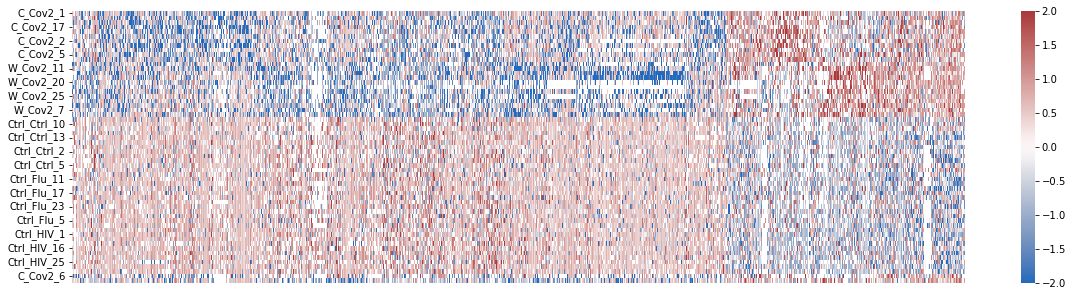

In [20]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
sns.heatmap(zscore_df[zscore_order].astype(float), cmap='vlag', ax=ax, \
               xticklabels=False, vmin=-2, vmax=2, rasterized=True)
plt.savefig("COVID_DMLs.heatmap.pdf")

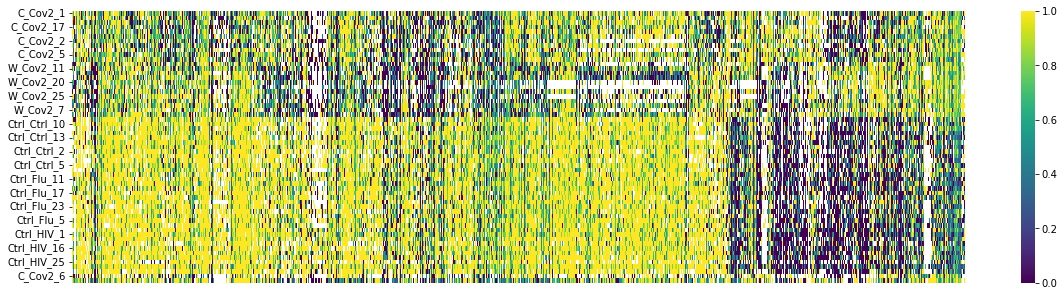

In [21]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
sns.heatmap(plot_merge_df[zscore_order].astype(float), cmap='viridis', ax=ax, \
               xticklabels=False, rasterized=True)
plt.savefig("COVID_DMLs.mCG.heatmap.pdf")

In [22]:
dmr_corr = target_mCG_df.iloc[:, 10:].corr()

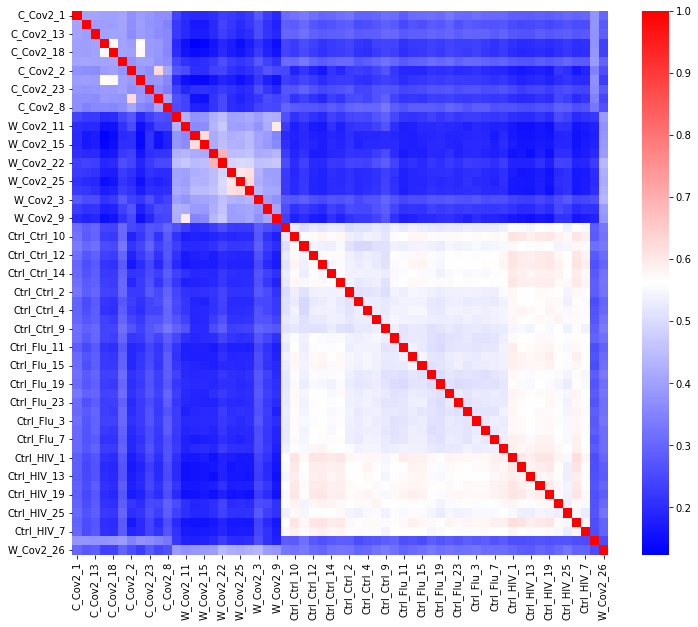

In [26]:
fig, ax = plt.subplots(1,1,figsize=(12, 10))
sns.heatmap(dmr_corr, cmap='bwr')
plt.savefig("COVID_DMLs.corr.pdf")

In [19]:
!rm MRSA_DMLs.corr.pdf